In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ptfrwrd","key":"4a2f5a982ed53062345976efa42bd4c8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d  stefanoleone992/imdb-extensive-dataset  

 76% 49.0M/64.2M [00:02<00:01, 12.5MB/s]
100% 64.2M/64.2M [00:02<00:00, 25.2MB/s]


In [5]:
! mkdir data
! unzip imdb-extensive-dataset.zip -d data

Archive:  imdb-extensive-dataset.zip
  inflating: data/IMDb movies.csv    
  inflating: data/IMDb names.csv     
  inflating: data/IMDb ratings.csv   
  inflating: data/IMDb title_principals.csv  


# Let`s see the data:

- do EDA;
- find anomalies;
- some statistic.

In [6]:
imdb_ratings = pd.read_csv('data/IMDb ratings.csv', usecols=['weighted_average_vote', 'imdb_title_id'])
imdb_movies = pd.read_csv('data/IMDb movies.csv', usecols = ['title', 'year', 'genre', 'duration', 'country', 'imdb_title_id', 'director', 'language'])
ratings = pd.merge(imdb_movies,imdb_ratings, on='imdb_title_id', how='inner')
ratings

,imdb_title_id,title,year,genre,duration,country,language,director,weighted_average_vote
0,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,6.1
1,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.9
2,tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,5.2
3,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,English,Sidney Olcott,5.7
...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,2019,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,7.2
81269,tt9905412,Ottam,2019,Drama,120,India,Malayalam,Zam,7.8
81270,tt9905462,Pengalila,2019,Drama,111,India,Malayalam,T.V. Chandran,8.4
81271,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,8.4


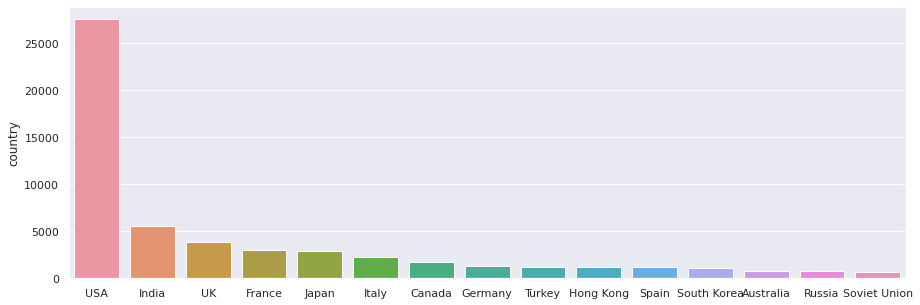

In [7]:
country_count=ratings['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:15]
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = topcountries.index, y = 'country' , data = topcountries)

In [8]:
counties_ratings = {'USA': ratings['weighted_average_vote'].loc[ratings['country'] == 'USA'].mean() , 
                    'India': ratings['weighted_average_vote'].loc[ratings['country'] == 'India'].mean(), 
                    'UK': ratings['weighted_average_vote'].loc[ratings['country'] == 'UK'].mean(), 
                    'France': ratings['weighted_average_vote'].loc[ratings['country'] == 'France'].mean(), 
                    'Japan': ratings['weighted_average_vote'].loc[ratings['country'] == 'Japan'].mean(), 
                    'Italy': ratings['weighted_average_vote'].loc[ratings['country'] == 'Italy'].mean(), 
                    'Canada': ratings['weighted_average_vote'].loc[ratings['country'] == 'Canada'].mean(), 
                    'Germany': ratings['weighted_average_vote'].loc[ratings['country'] == 'Germany'].mean(), 
                    'Turkey': ratings['weighted_average_vote'].loc[ratings['country'] == 'Turkey'].mean(), 
                    'Hong Kong': ratings['weighted_average_vote'].loc[ratings['country'] == 'Hong Kong'].mean(), 
                    'Spain': ratings['weighted_average_vote'].loc[ratings['country'] == 'Spain'].mean(), 
                    'South Korea': ratings['weighted_average_vote'].loc[ratings['country'] == 'South Korea'].mean(), 
                    'Australia': ratings['weighted_average_vote'].loc[ratings['country'] == 'Australia'].mean(), 
                    'Russia': ratings['weighted_average_vote'].loc[ratings['country'] == 'Russia'].mean(),
                    'Soviet Union': ratings['weighted_average_vote'].loc[ratings['country'] == 'Soviet Union'].mean()}

counties_ratings = pd.DataFrame.from_dict(counties_ratings, orient='index')
counties_ratings = counties_ratings.rename(columns={0: 'rating'})
counties_ratings = counties_ratings.sort_values(by=['rating'])
counties_ratings

,rating
Canada,5.417750
USA,5.588720
Russia,5.703867
Australia,5.708568
UK,5.820625
Spain,5.821273
Italy,5.861350
Turkey,5.876582
Germany,5.941238
Hong Kong,6.110983


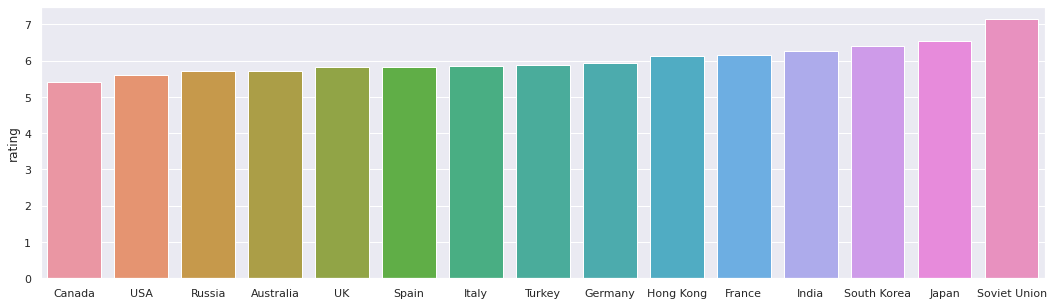

In [9]:
plt.figure(figsize=(18,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = counties_ratings.index, y = 'rating', data = counties_ratings)

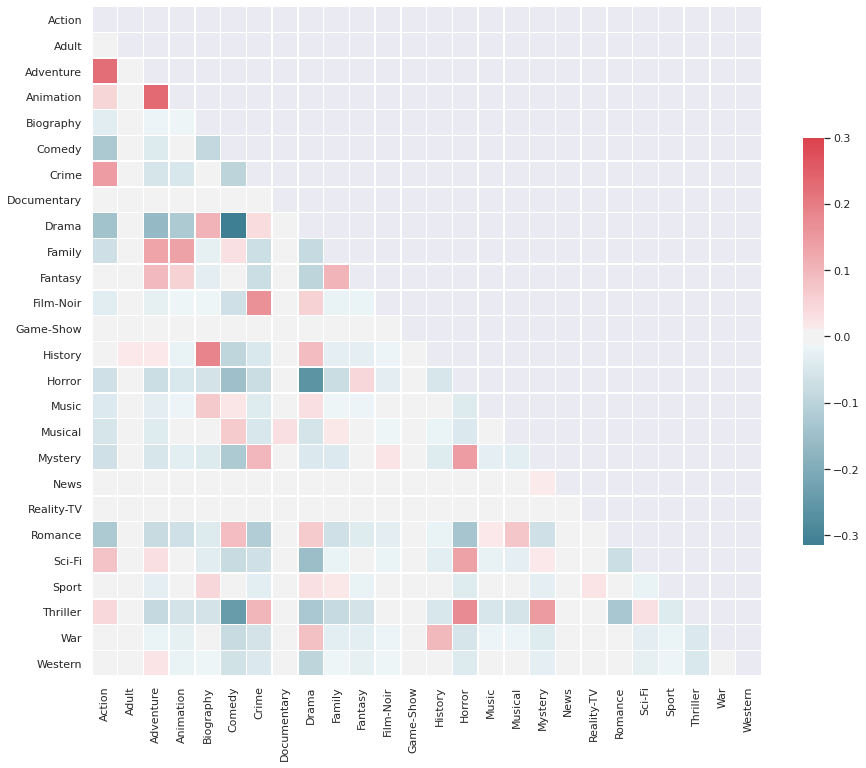

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

genre_data = ratings['genre'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
test = genre_data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

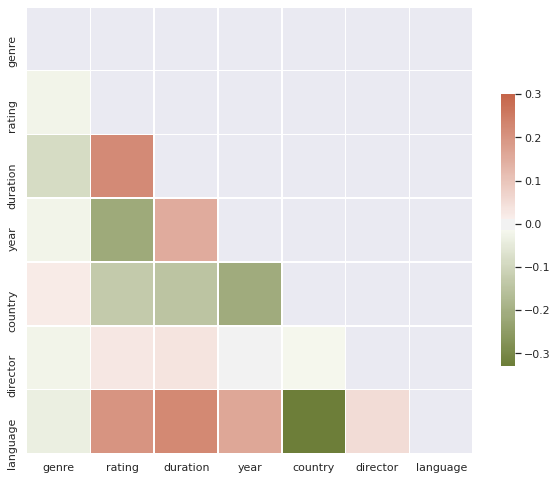

,genre,rating,duration,year,country,director,language
genre,1.000000,-0.021763,-0.086350,-0.021424,0.021050,-0.020793,-0.038733
rating,-0.021763,1.000000,0.221752,-0.213843,-0.127784,0.029102,0.201514
duration,-0.086350,0.221752,1.000000,0.150164,-0.144714,0.038391,0.224677
year,-0.021424,-0.213843,0.150164,1.000000,-0.210027,0.008848,0.162640
country,0.021050,-0.127784,-0.144714,-0.210027,1.000000,-0.012620,-0.329223
director,-0.020793,0.029102,0.038391,0.008848,-0.012620,1.000000,0.051870
language,-0.038733,0.201514,0.224677,0.162640,-0.329223,0.051870,1.000000


In [11]:
genre_ratings = {
    'genre': ratings.genre,
    'rating': ratings.weighted_average_vote,
    'duration': ratings.duration,
    'year': ratings.year,
    'country': ratings.country,
    'director': ratings.director,
    'language': ratings.language
}
genre_ratings = pd.DataFrame.from_dict(genre_ratings)
#genre_ratings['genre'] = genre_ratings['genre'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
genre_ratings['genre'] = genre_ratings['genre'].astype('category').cat.codes
genre_ratings['country'] = genre_ratings['country'].astype('category').cat.codes
genre_ratings['director'] = genre_ratings['director'].astype('category').cat.codes
genre_ratings['language'] = genre_ratings['language'].astype('category').cat.codes
corr = genre_ratings.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(100, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
corr

In [12]:
! kaggle datasets download -d  jrobischon/wikipedia-movie-plots 

 97% 29.0M/29.9M [00:01<00:00, 11.4MB/s]
100% 29.9M/29.9M [00:01<00:00, 23.7MB/s]


In [13]:
! unzip  wikipedia-movie-plots.zip -d data

Archive:  wikipedia-movie-plots.zip
  inflating: data/wiki_movie_plots_deduped.csv  


# Let`s download the new dataset and merge all datasets:

- also do some EDA;
- detection anomalies;
- do some statistics.

In [14]:
movies_plots_data = pd.read_csv('data/wiki_movie_plots_deduped.csv', usecols=['Release Year','Title','Plot'])
movies_plots_data.drop_duplicates(inplace=True)
movies_plots_data = movies_plots_data.rename(columns={'Title': 'title', 'Release Year': 'release year', 'Plot': 'plot'})
ratings = ratings.rename(columns={'year': 'release year'})
ratings.drop_duplicates(inplace=True)
merge_data = movies_plots_data.merge(ratings, how="inner", on=['title','release year'])
merge_data

,release year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7
...,...,...,...,...,...,...,...,...,...,...
19084,2013,Selam,The film opens with a Senegalese boy named Kha...,tt2737018,"Drama, Romance",104,Turkey,Turkish,Levent Demirkale,6.7
19085,2014,Sivas,The film follows an eleven-year-old boy named ...,tt3894344,Drama,97,"Germany, Turkey",Turkish,Kaan Müjdeci,7.5
19086,2014,The Water Diviner,"The film begins in 1919, just after World War ...",tt3007512,"Drama, History, War",111,"Australia, USA","English, Turkish, Greek, Russian",Russell Crowe,7.0
19087,2017,Olanlar Oldu,"Zafer, a sailor living with his mother Döndü i...",tt6313158,Comedy,108,Turkey,Turkish,Hakan Algül,6.3


In [15]:
merge_data.columns

Index(['release year', 'title', 'plot', 'imdb_title_id', 'genre', 'duration',
       'country', 'language', 'director', 'weighted_average_vote'],
      dtype='object')

**See count of movies at 15-years period (from 1996 to 2017)**

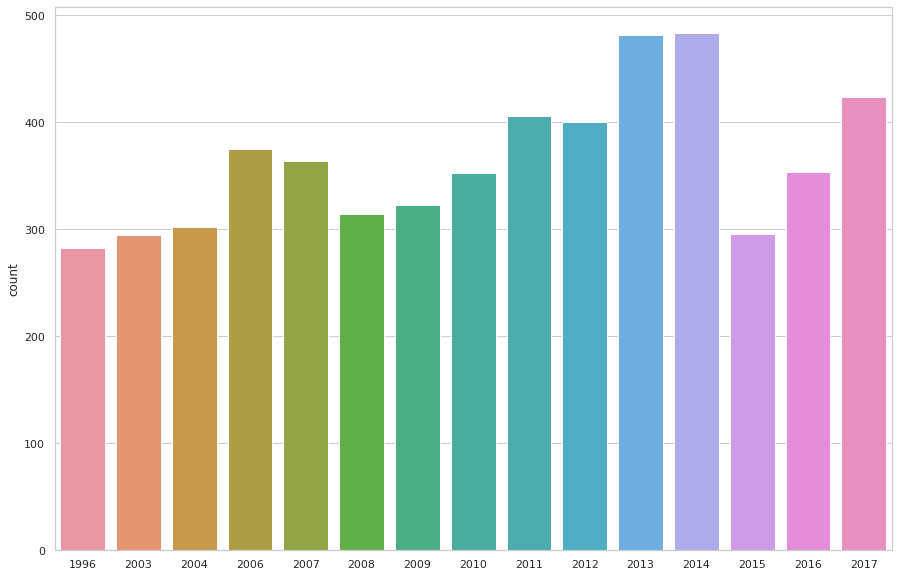

In [16]:
movies_count = merge_data['release year'].value_counts().sort_values(ascending=False)
movies_count = pd.DataFrame(movies_count).rename(columns={'release year': 'count'})
movies_for_plot = movies_count[0:15]
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.barplot(x=movies_for_plot.index, y="count", data=movies_for_plot)

**See top movie directors:**

[Text(0, 0, 'Michael Curtiz'),
 Text(0, 0, 'Lloyd Bacon'),
 Text(0, 0, 'Alfred Hitchcock'),
 Text(0, 0, 'Norman Taurog'),
 Text(0, 0, 'John Ford'),
 Text(0, 0, 'Mervyn LeRoy'),
 Text(0, 0, 'Richard Thorpe'),
 Text(0, 0, 'Gordon Douglas'),
 Text(0, 0, 'Raoul Walsh'),
 Text(0, 0, 'Henry Hathaway'),
 Text(0, 0, 'William A. Wellman'),
 Text(0, 0, 'George Marshall'),
 Text(0, 0, 'Woody Allen'),
 Text(0, 0, 'Alfred E. Green'),
 Text(0, 0, 'William A. Seiter'),
 Text(0, 0, 'J. Lee Thompson'),
 Text(0, 0, 'Allan Dwan'),
 Text(0, 0, 'Ray Enright'),
 Text(0, 0, 'Roy Del Ruth'),
 Text(0, 0, 'George Cukor')]

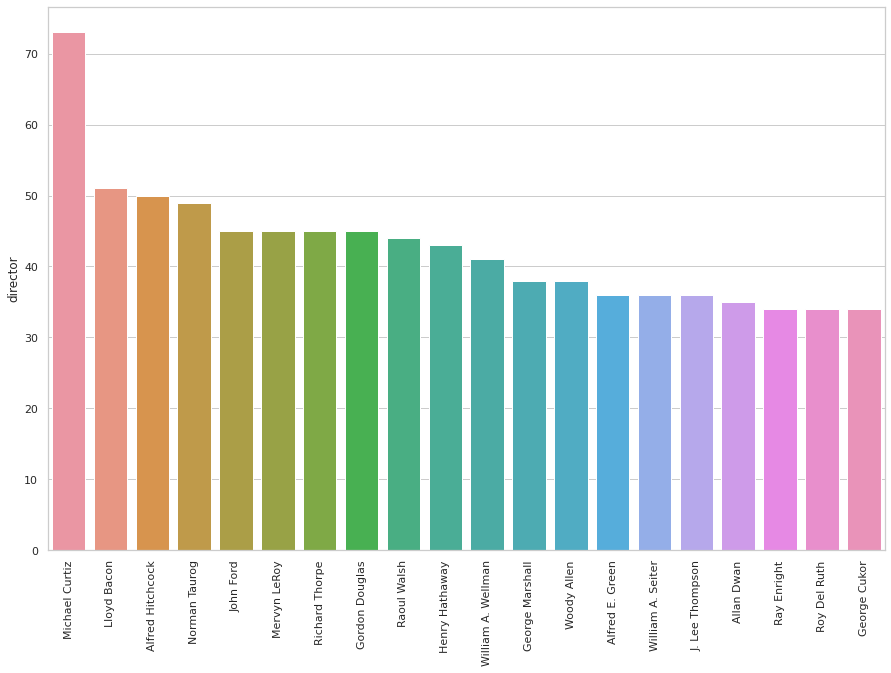

In [17]:
director_count = merge_data['director'].value_counts().sort_values(ascending=False)
director_count = pd.DataFrame(director_count)
top_directors = director_count[0:20]
plt.figure(figsize=(15,10))
ax = sns.barplot(x = top_directors.index, y = 'director' , data = top_directors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

**See wordcloud of plots:**

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

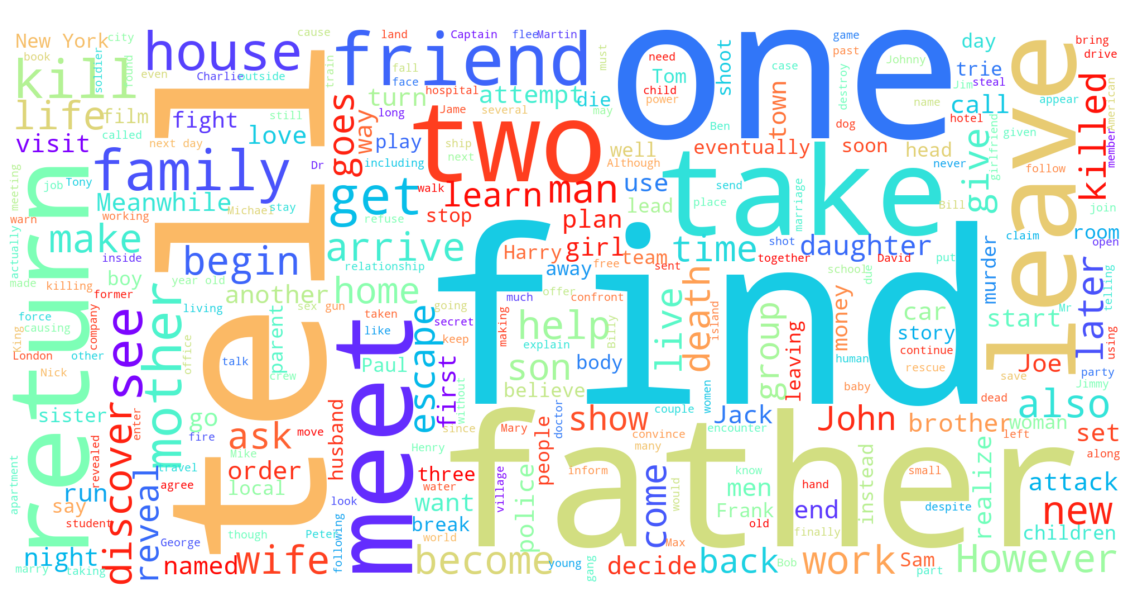

In [19]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords

words_cloud = merge_data['plot'].str.split("(").str[0].value_counts().keys()
eng_stopwords = stopwords.words("english")
wc1 = WordCloud(stopwords=eng_stopwords,scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(words_cloud))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Job Descriptions",color='white',fontsize=20)
plt.show()

**See ratings for top-20 genre:**

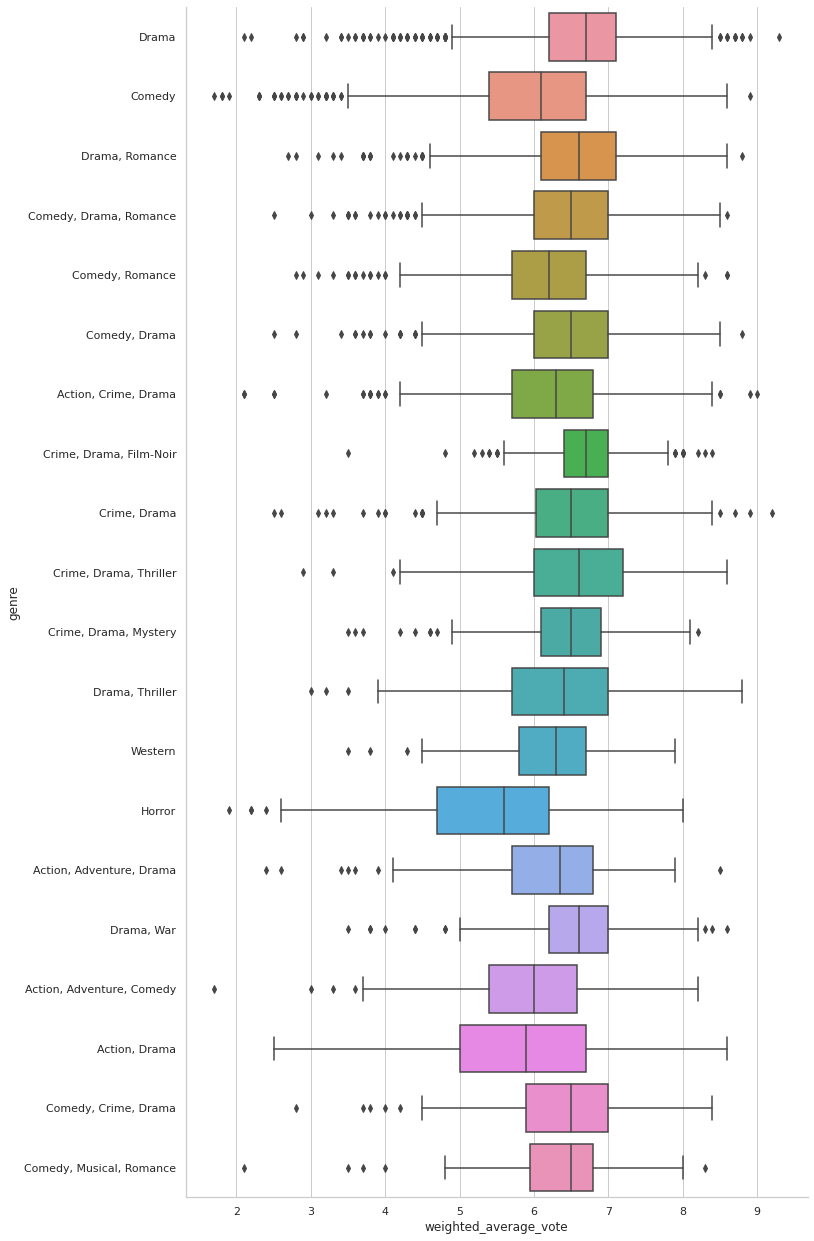

In [20]:
gr = sns.catplot(x = 'weighted_average_vote', y = 'genre', kind = "box", data = merge_data, order = merge_data.genre.value_counts().iloc[:20].index)
gr.fig.set_size_inches(20, 20)

**See ratings for top-20 directors:**

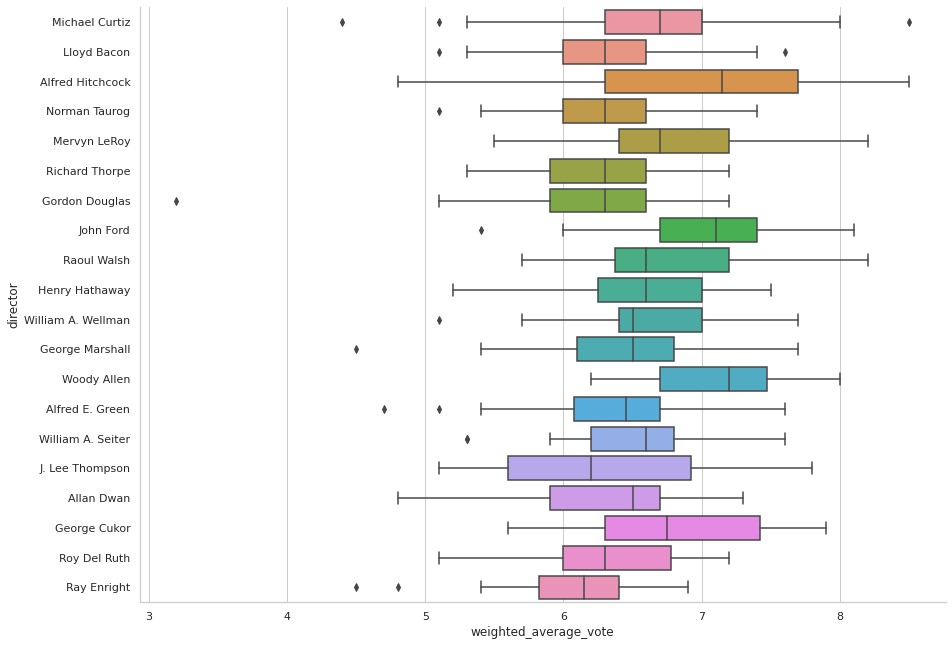

In [21]:
gr = sns.catplot(x = 'weighted_average_vote', y = 'director', kind = "box", data = merge_data, order = merge_data.director.value_counts().iloc[:20].index)
gr.fig.set_size_inches(20, 10)

**See ratings for the top 20 years of movies counts:**


In [22]:
merge_data = merge_data.rename(columns={'release year': 'year'})

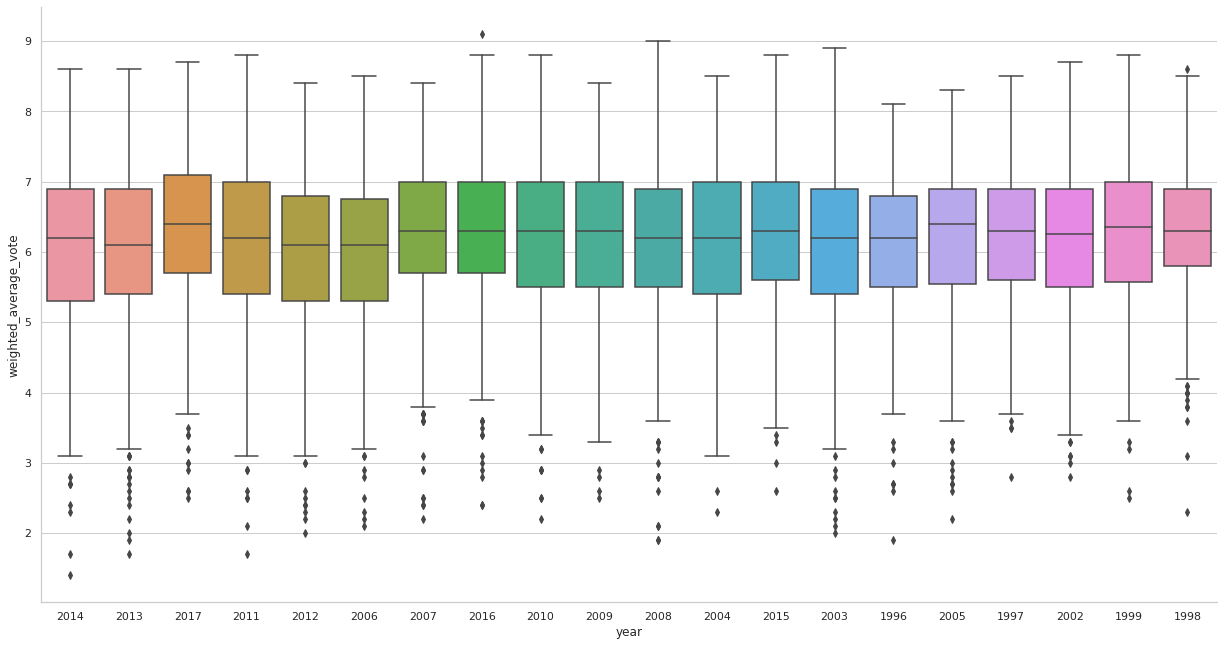

In [23]:
gr = sns.catplot(x = 'year', y = 'weighted_average_vote', kind = "box", data = merge_data, order=merge_data.year.value_counts().iloc[0:20].index)
gr.fig.set_size_inches(20, 10)

**See lenght of plots distribution:**

In [24]:
merge_data['length'] = merge_data['plot'].str.len()
merge_data.head()

,year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote,length
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7,3001
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1,2974
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9,637
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2,3039
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7,350


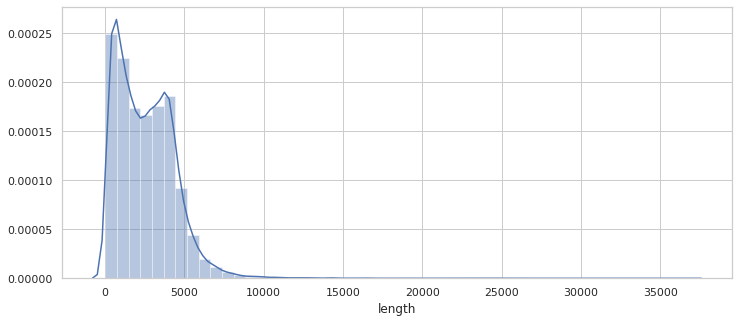

In [25]:
plt.figure(figsize=(12,5))
g = sns.distplot(merge_data['length'])
plt.show()

# Create topic model (LDA) for plots:

- pre-proccessing the data;
- create test LDA-model;
- analyse influence of alpa, eta hyperparametrs and number of topics for increase quality;
- based on LDA-model create topics for each movie.

In [26]:
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import gensim, spacy
import re

In [27]:
merge_data['plot'] = merge_data['plot'].values.tolist()
merge_data

,year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote,length
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7,3001
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1,2974
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9,637
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2,3039
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7,350
...,...,...,...,...,...,...,...,...,...,...,...
19084,2013,Selam,The film opens with a Senegalese boy named Kha...,tt2737018,"Drama, Romance",104,Turkey,Turkish,Levent Demirkale,6.7,5586
19085,2014,Sivas,The film follows an eleven-year-old boy named ...,tt3894344,Drama,97,"Germany, Turkey",Turkish,Kaan Müjdeci,7.5,2101
19086,2014,The Water Diviner,"The film begins in 1919, just after World War ...",tt3007512,"Drama, History, War",111,"Australia, USA","English, Turkish, Greek, Russian",Russell Crowe,7.0,3492
19087,2017,Olanlar Oldu,"Zafer, a sailor living with his mother Döndü i...",tt6313158,Comedy,108,Turkey,Turkish,Hakan Algül,6.3,388


In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [29]:
# Remove characters
merge_data['plot'] = [re.sub('\s+', ' ', sent) for sent in merge_data['plot']]
merge_data['plot'] = [re.sub("\'", "", sent) for sent in merge_data['plot']]
# Remove prop nouns
merge_data['plot'] = [re.sub('([^.])( [A-Z]\w*)', ' ', sent) for sent in merge_data['plot']]

In [30]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

plots_words = list(sent_to_words(merge_data['plot']))

In [31]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bigram = Phrases(plots_words, min_count=5, threshold=100)
trigram = Phrases(bigram[plots_words], threshold=100)  

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [32]:
! python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [33]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'scene', 'film', 'raju', 'also', 'vikram', 'vijay', 'meanwhile',
                   'say', 'get', 'take','come', 'make', "name", 'however', 'tell','see', 'go', 'end', 'later','give'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in gensim.parsing.preprocessing.STOPWORDS.union(set([ 'from', 'subject', 're', 'edu',
                                                                                                                           'use', 'scene', 'film', 'raju', 'also', 'vikram', 'vijay', 'meanwhile',
                                                                                                                            'say', 'get', 'take','come', 'make', "name", 'however', 
                                                                                                                         'tell','see', 'go', 'end', 'later','give', 'man', 'ask',
                                                                                                                         'day', 'try', 'morning', 'evening', 'night', 'want', 'away', 'know',
                                                                                                                         'turn', 'year', 'month', 'time', 'play', 'story', 'new',
                                                                                                                         'movie', 'father', 'mother', 'brother', 'woman', 'old',
                                                                                                                         'daughter', 'soon', 'way', 'live' ]))] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [34]:
# Remove Stop Words
plots_words_nostops = remove_stopwords(plots_words)

# Form Bigrams
plots_words_bigrams = make_bigrams(plots_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
plots_lemmatized = lemmatization(plots_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Remove stop words again
plots_lemmatized = remove_stopwords(plots_lemmatized)

In [35]:
id2word = corpora.Dictionary(plots_lemmatized)
texts = plots_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [36]:
from gensim.models.ldamulticore import LdaMulticore

def calc_coherence_values(dictionary, corpus, texts, limit, start = 2, step = 2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, eta = 0.001, random_state=123)
          model_list.append(model)
          coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
          coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus, texts = texts, start = 2, limit = 41, step = 3)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


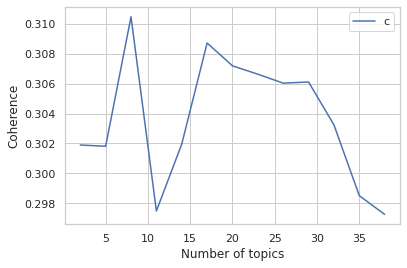

In [37]:
limit, start, step = 41, 2, 3
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
index = coherence_values.index(max(coherence_values))
model_list[index].show_topics()

[(0,
  '0.018*"kill" + 0.007*"police" + 0.007*"death" + 0.006*"escape" + 0.006*"reveal" + 0.005*"leave" + 0.005*"car" + 0.005*"die" + 0.005*"gang" + 0.005*"body"'),
 (1,
  '0.008*"kill" + 0.007*"friend" + 0.007*"police" + 0.006*"family" + 0.006*"work" + 0.006*"ship" + 0.006*"plan" + 0.005*"son" + 0.005*"wife" + 0.005*"return"'),
 (2,
  '0.009*"leave" + 0.007*"kill" + 0.007*"money" + 0.007*"car" + 0.007*"arrive" + 0.006*"train" + 0.005*"help" + 0.005*"attack" + 0.005*"attempt" + 0.004*"return"'),
 (3,
  '0.013*"love" + 0.011*"police" + 0.009*"kill" + 0.008*"leave" + 0.008*"reveal" + 0.008*"friend" + 0.006*"family" + 0.006*"fall" + 0.006*"son" + 0.006*"life"'),
 (4,
  '0.009*"leave" + 0.008*"team" + 0.006*"return" + 0.005*"kill" + 0.005*"friend" + 0.005*"child" + 0.005*"home" + 0.004*"work" + 0.004*"help" + 0.004*"reveal"'),
 (5,
  '0.008*"love" + 0.007*"girl" + 0.007*"leave" + 0.007*"life" + 0.006*"friend" + 0.006*"reveal" + 0.006*"help" + 0.005*"wit" + 0.005*"child" + 0.005*"return"'),

In [39]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 17.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a78aa25b70a3aeab7b93333512f8920c5b5ffadf1674b76fcf1dde8b3a4a83a2
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=941f1b32adc50f938b434ca027295fdce9b663479e7792c41c099d96d95d3607
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(model_list[index], corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)